#Ananya Garg(21BCE0518)

Assignment 15 sep

  Perform Data preprocessing on Titanic dataset

1.Data Collection.

   Please download the dataset from

   https://www.kaggle.com/datasets/yasserh/titanic-dataset

2.Data Preprocessing

    o	Import the Libraries.
    o	Importing the dataset.
    o	Checking for Null Values.
    o	Data Visualization.
    o	Outlier Detection
    o	Splitting Dependent and Independent variables
    o	Perform Encoding
    o	Feature Scaling.
    o	Splitting Data into Train and Test

#Data Collection

#Data Preprocessing

#Import the Libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Importing the dataset.


In [84]:
df=pd.read_csv("/content/Titanic-Dataset.csv")

In [85]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [87]:
df.shape

(891, 12)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [90]:
corr=df.corr()
corr

<ipython-input-90-7d5195e2bf4d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

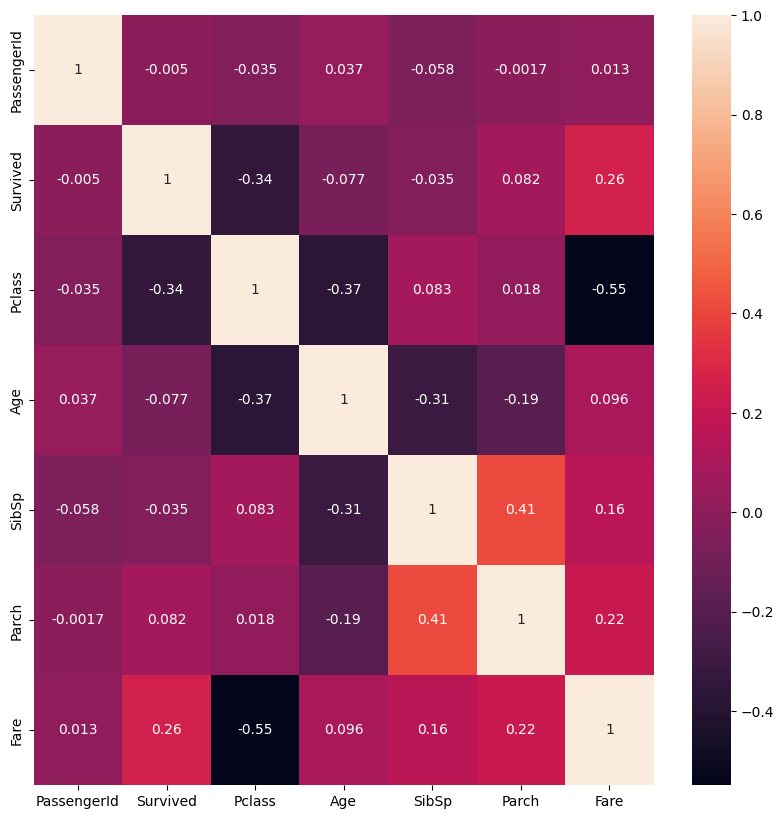

In [91]:
plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [92]:
df.corr().Survived.sort_values(ascending=False)

<ipython-input-92-fe51b8bb09d5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().Survived.sort_values(ascending=False)


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

#Checking for Null Values

In [93]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [94]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [95]:
df.Name.nunique()

891

In [96]:
df.Sex.nunique()

2

In [97]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [98]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [99]:
df.Ticket.nunique()

681

In [100]:
df.Embarked.nunique()

3

In [101]:
df.Cabin.nunique()

147

#Since Age,Cabin and Embarked contain null values we need to handle those null values

In [102]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [103]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True)

In [105]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [106]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [107]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [108]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [109]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Data Visualization

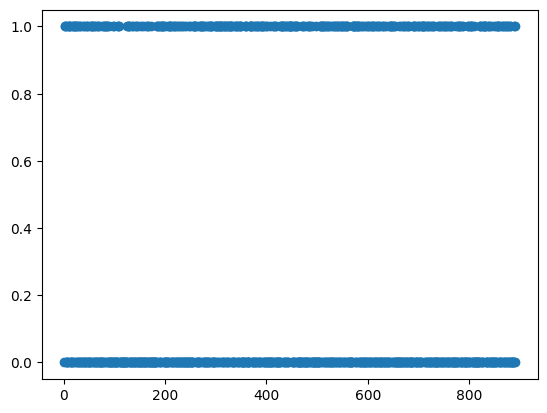

In [110]:
plt.scatter(df["PassengerId"],df["Survived"])

<Axes: xlabel='Sex', ylabel='Survived'>

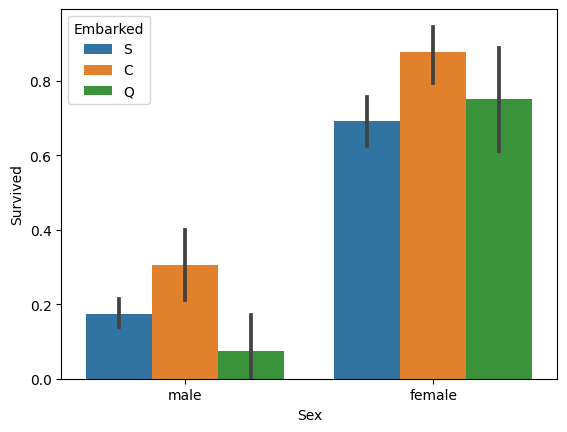

In [111]:
sns.barplot(data=df,x="Sex",y="Survived",hue="Embarked")

<Axes: xlabel='Sex', ylabel='count'>

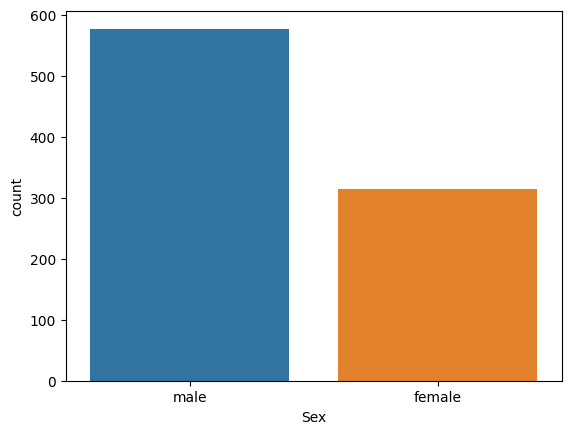

In [112]:
sns.countplot(x="Sex",data=df)

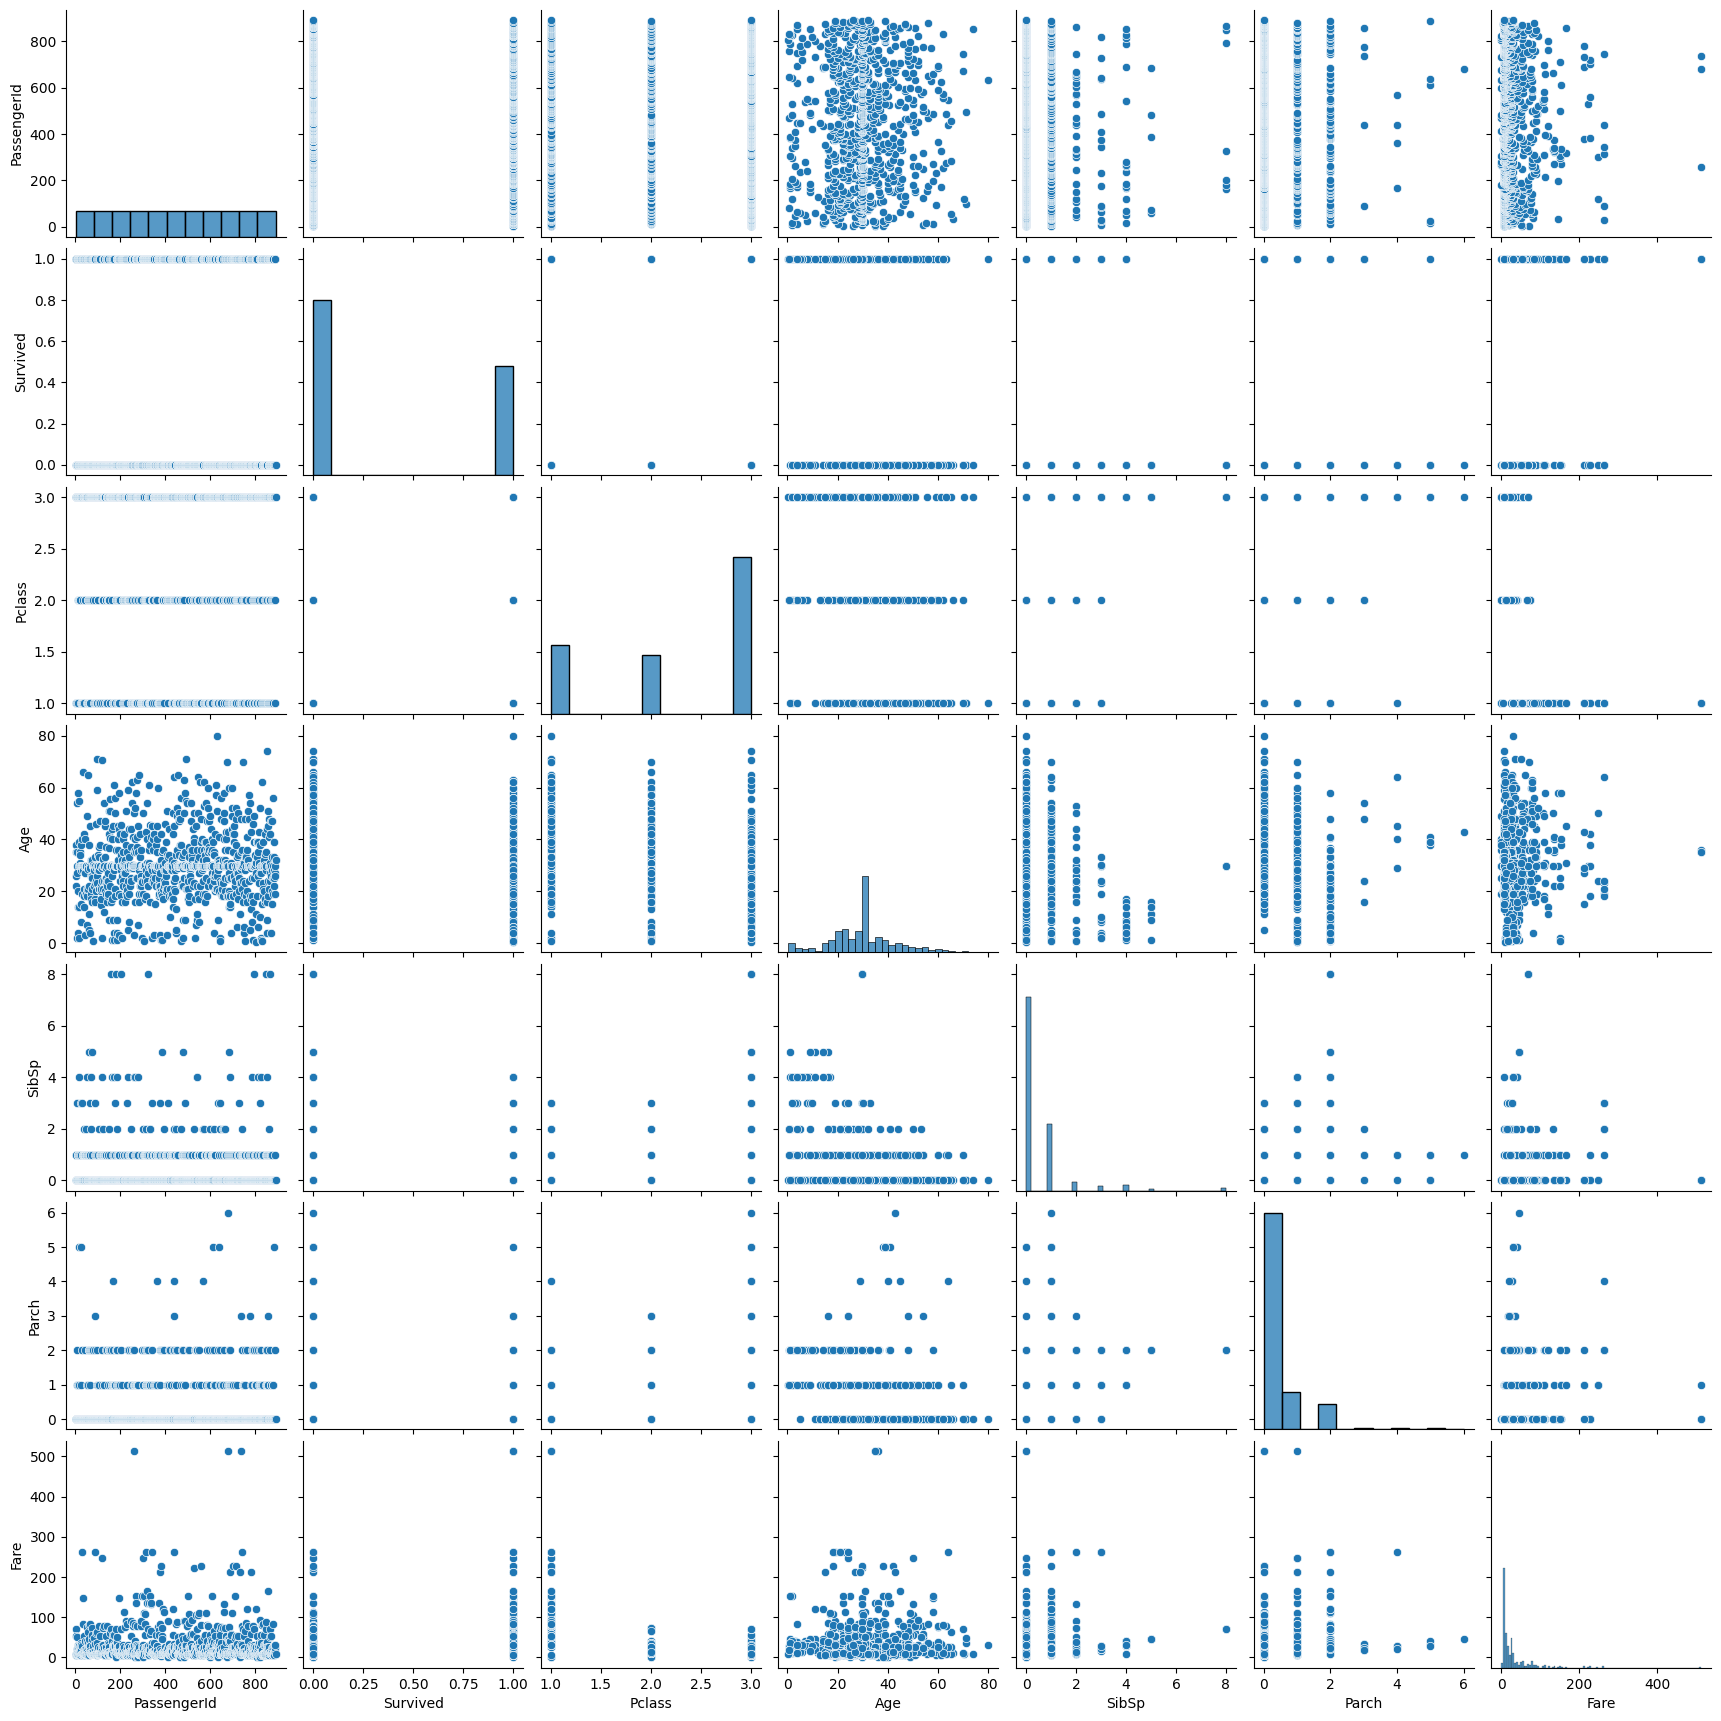

In [113]:
sns.pairplot(df)

<ipython-input-114-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

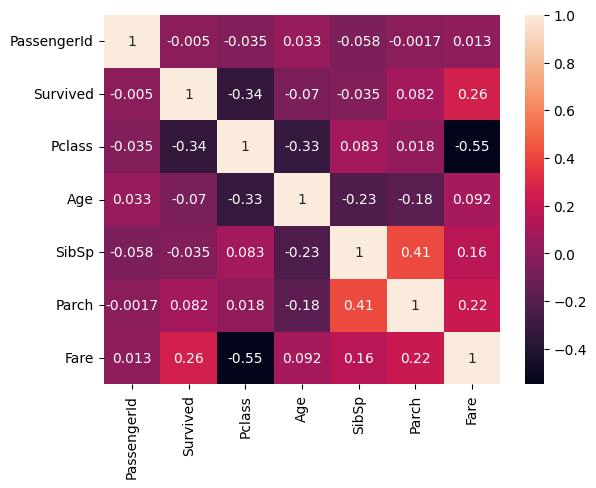

In [114]:
sns.heatmap(df.corr(),annot=True)

#Outlier Detection

<Axes: >

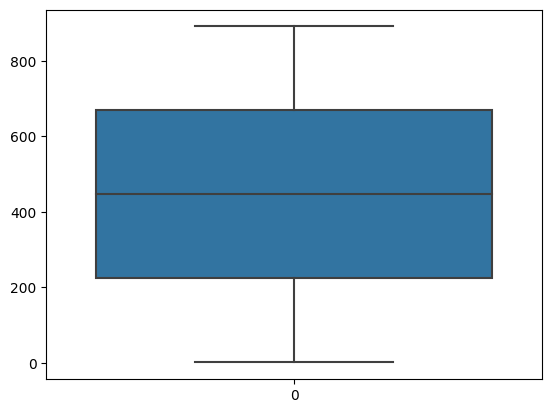

In [115]:
sns.boxplot(df["PassengerId"])

<Axes: >

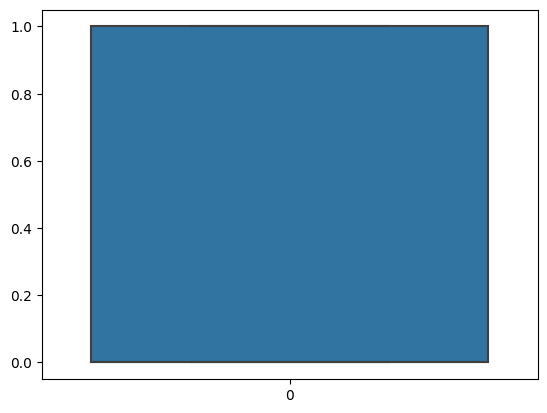

In [116]:
sns.boxplot(df["Survived"])

<Axes: >

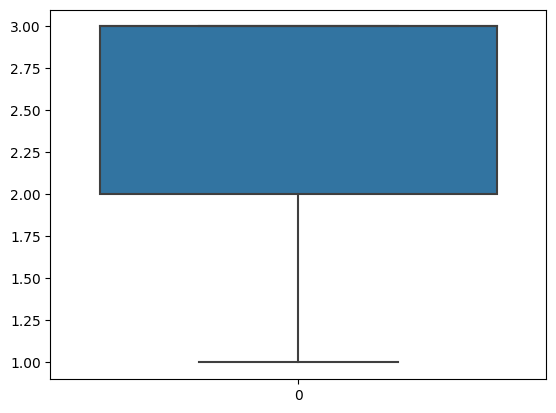

In [117]:
sns.boxplot(df["Pclass"])

<Axes: >

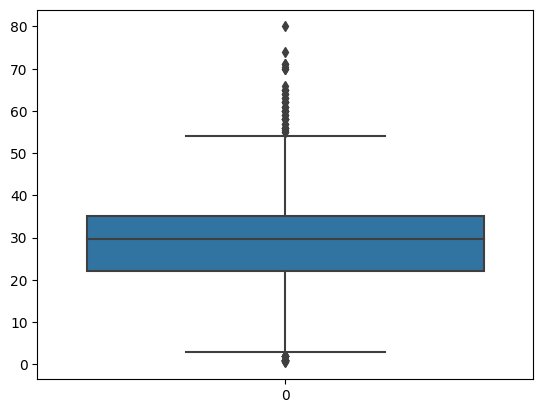

In [118]:
sns.boxplot(df["Age"])

#Removal of outlier in "Age"

In [119]:
df.shape

(891, 12)

In [120]:
q1=df.Age.quantile(0.25)
q3=df.Age.quantile(0.75)

In [121]:
print(q1)
print(q3)

22.0
35.0


In [122]:
IQR=q3-q1
IQR

13.0

In [123]:
upper_limit=q3+1.5*IQR
upper_limit

54.5

In [124]:
lower_limit=q1-1.5*IQR
lower_limit

2.5

In [125]:
df['Age']=np.where(df['Age']>upper_limit,upper_limit,np.where(df['Age']<lower_limit,lower_limit,df['Age']))

<Axes: >

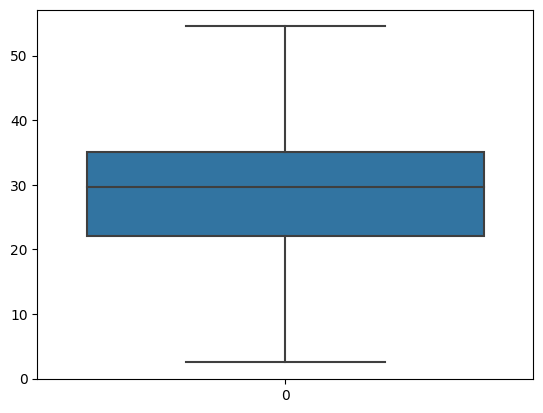

In [126]:
sns.boxplot(df["Age"])

<Axes: >

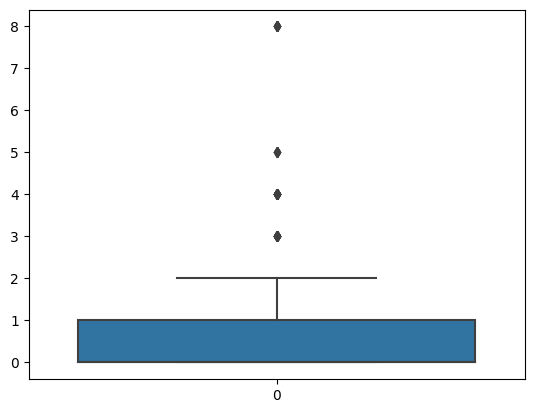

In [127]:
sns.boxplot(df["SibSp"])

#Removal of outlier in "SibSp"

In [128]:
q1=df.SibSp.quantile(0.25)
q3=df.SibSp.quantile(0.75)
print(q1)
print(q3)

0.0
1.0


In [129]:
IQR=q3-q1
IQR

1.0

In [130]:
upper_limit=q3+1.5*IQR
upper_limit

2.5

In [131]:
lower_limit=q1-1.5*IQR
lower_limit

-1.5

In [132]:
df['SibSp']=np.where(df['SibSp']>upper_limit,upper_limit,np.where(df['SibSp']<lower_limit,lower_limit,df['SibSp']))

<Axes: >

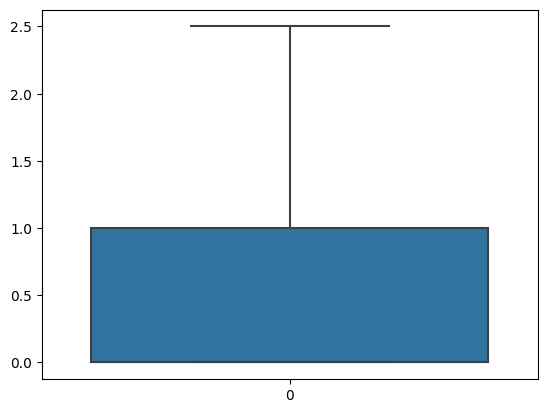

In [133]:
sns.boxplot(df.SibSp)

In [134]:
df.shape

(891, 12)

<Axes: >

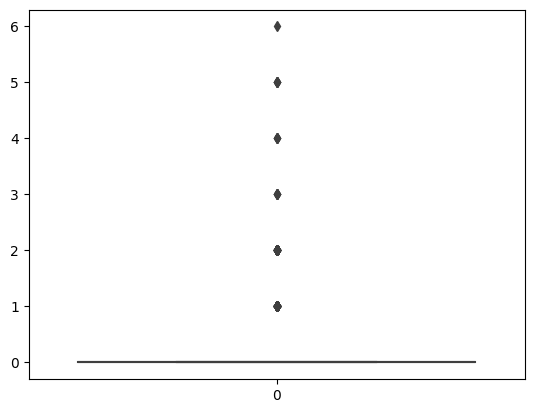

In [135]:
sns.boxplot(df["Parch"])

#Removal of outlier in "Parch"

In [136]:
q1=df.Parch.quantile(0.25)
q3=df.Parch.quantile(0.75)
print(q1)
print(q3)

0.0
0.0


In [137]:
IQR=q3-q1
IQR

0.0

In [138]:
upper_limit=q3+1.5*IQR
upper_limit

0.0

In [139]:
lower_limit=q1-1.5*IQR
lower_limit

0.0

In [140]:
df['Parch']=np.where(df['Parch']>upper_limit,upper_limit,np.where(df['Parch']<lower_limit,lower_limit,df['Parch']))

<Axes: >

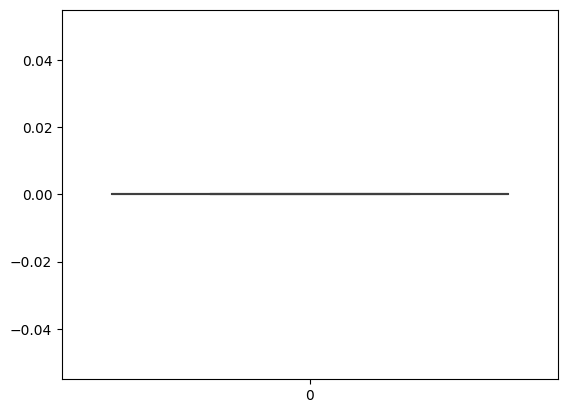

In [141]:
sns.boxplot(df.Parch)

In [142]:
df.shape

(891, 12)

<Axes: >

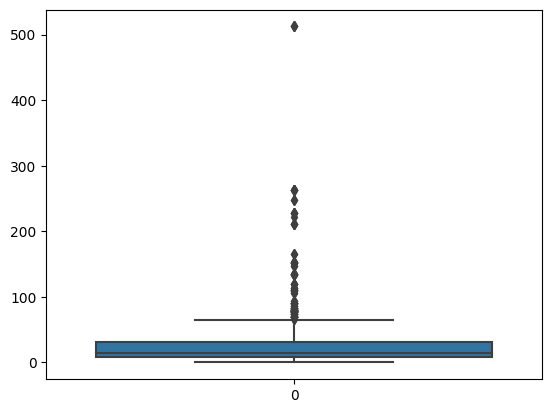

In [143]:
sns.boxplot(df["Fare"])

#Removal of outlier in "Fare"

In [144]:
q1=df.Fare.quantile(0.25)
q3=df.Fare.quantile(0.75)
print(q1)
print(q3)

7.9104
31.0


In [145]:
IQR=q3-q1
IQR

23.0896

In [146]:
upper_limit=q3+1.5*IQR
upper_limit

65.6344

In [147]:
lower_limit=q1-1.5*IQR
lower_limit

-26.724

In [148]:
df['Fare']=np.where(df['Fare']>upper_limit,upper_limit,np.where(df['Fare']<lower_limit,lower_limit,df['Fare']))

<Axes: >

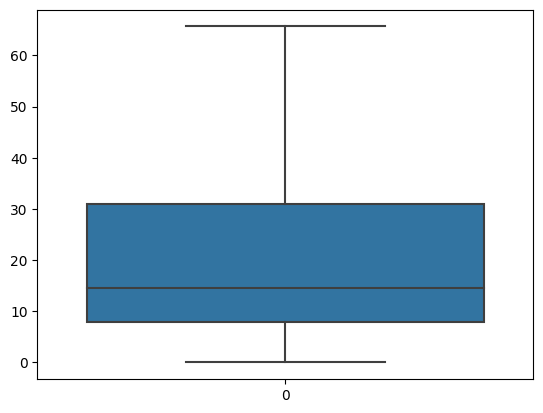

In [149]:
sns.boxplot(df['Fare'])

In [150]:
df.shape

(891, 12)

# Splitting Dependent and Independent variables

In [151]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,65.6344,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,B96 B98,S


In [152]:
#indenpendent variables hould be 2 d array or dataframe
x=df.drop(columns=["Survived"],axis=1)
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,B96 B98,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,65.6344,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,B96 B98,S


In [153]:
x.shape

(891, 11)

In [154]:
type(x)

pandas.core.frame.DataFrame

In [155]:
y=df["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

#Perform Encoding

In [156]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,B96 B98,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,65.6344,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,B96 B98,S


In [157]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [158]:
x["Name"]=le.fit_transform(x["Name"])

In [159]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,108,male,22.0,1.0,0.0,A/5 21171,7.2500,B96 B98,S
1,2,1,190,female,38.0,1.0,0.0,PC 17599,65.6344,C85,C
2,3,3,353,female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,272,female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,3,15,male,35.0,0.0,0.0,373450,8.0500,B96 B98,S


In [160]:
print(le.classes_)

['Abbing, Mr. Anthony' 'Abbott, Mr. Rossmore Edward'
 'Abbott, Mrs. Stanton (Rosa Hunt)' 'Abelson, Mr. Samuel'
 'Abelson, Mrs. Samuel (Hannah Wizosky)' 'Adahl, Mr. Mauritz Nils Martin'
 'Adams, Mr. John' 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)'
 'Aks, Mrs. Sam (Leah Rosen)' 'Albimona, Mr. Nassef Cassem'
 'Alexander, Mr. William' 'Alhomaki, Mr. Ilmari Rudolf' 'Ali, Mr. Ahmed'
 'Ali, Mr. William' 'Allen, Miss. Elisabeth Walton'
 'Allen, Mr. William Henry' 'Allison, Master. Hudson Trevor'
 'Allison, Miss. Helen Loraine'
 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)'
 'Allum, Mr. Owen George'
 'Andersen-Jensen, Miss. Carla Christine Nielsine' 'Anderson, Mr. Harry'
 'Andersson, Master. Sigvard Harald Elias'
 'Andersson, Miss. Ebba Iris Alfrida' 'Andersson, Miss. Ellis Anna Maria'
 'Andersson, Miss. Erna Alexandra' 'Andersson, Miss. Ingeborg Constanzia'
 'Andersson, Miss. Sigrid Elisabeth' 'Andersson, Mr. Anders Johan'
 'Andersson, Mr. August Edvard ("Wennerstrom")'
 'Andersson, 

In [161]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'Abbing, Mr. Anthony': 0,
 'Abbott, Mr. Rossmore Edward': 1,
 'Abbott, Mrs. Stanton (Rosa Hunt)': 2,
 'Abelson, Mr. Samuel': 3,
 'Abelson, Mrs. Samuel (Hannah Wizosky)': 4,
 'Adahl, Mr. Mauritz Nils Martin': 5,
 'Adams, Mr. John': 6,
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)': 7,
 'Aks, Mrs. Sam (Leah Rosen)': 8,
 'Albimona, Mr. Nassef Cassem': 9,
 'Alexander, Mr. William': 10,
 'Alhomaki, Mr. Ilmari Rudolf': 11,
 'Ali, Mr. Ahmed': 12,
 'Ali, Mr. William': 13,
 'Allen, Miss. Elisabeth Walton': 14,
 'Allen, Mr. William Henry': 15,
 'Allison, Master. Hudson Trevor': 16,
 'Allison, Miss. Helen Loraine': 17,
 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)': 18,
 'Allum, Mr. Owen George': 19,
 'Andersen-Jensen, Miss. Carla Christine Nielsine': 20,
 'Anderson, Mr. Harry': 21,
 'Andersson, Master. Sigvard Harald Elias': 22,
 'Andersson, Miss. Ebba Iris Alfrida': 23,
 'Andersson, Miss. Ellis Anna Maria': 24,
 'Andersson, Miss. Erna Alexandra': 25,
 'Andersson, Miss. Ingeborg Constanz

In [162]:
x["Sex"]=le.fit_transform(x["Sex"])

In [163]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,108,1,22.0,1.0,0.0,A/5 21171,7.2500,B96 B98,S
1,2,1,190,0,38.0,1.0,0.0,PC 17599,65.6344,C85,C
2,3,3,353,0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,272,0,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,3,15,1,35.0,0.0,0.0,373450,8.0500,B96 B98,S


In [164]:
print(le.classes_)

['female' 'male']


In [165]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'female': 0, 'male': 1}

In [166]:
x["Ticket"]=le.fit_transform(x["Ticket"])

In [167]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,108,1,22.0,1.0,0.0,523,7.2500,B96 B98,S
1,2,1,190,0,38.0,1.0,0.0,596,65.6344,C85,C
2,3,3,353,0,26.0,0.0,0.0,669,7.9250,B96 B98,S
3,4,1,272,0,35.0,1.0,0.0,49,53.1000,C123,S
4,5,3,15,1,35.0,0.0,0.0,472,8.0500,B96 B98,S


In [168]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'110152': 0,
 '110413': 1,
 '110465': 2,
 '110564': 3,
 '110813': 4,
 '111240': 5,
 '111320': 6,
 '111361': 7,
 '111369': 8,
 '111426': 9,
 '111427': 10,
 '111428': 11,
 '112050': 12,
 '112052': 13,
 '112053': 14,
 '112058': 15,
 '112059': 16,
 '112277': 17,
 '112379': 18,
 '113028': 19,
 '113043': 20,
 '113050': 21,
 '113051': 22,
 '113055': 23,
 '113056': 24,
 '113059': 25,
 '113501': 26,
 '113503': 27,
 '113505': 28,
 '113509': 29,
 '113510': 30,
 '113514': 31,
 '113572': 32,
 '113760': 33,
 '113767': 34,
 '113773': 35,
 '113776': 36,
 '113781': 37,
 '113783': 38,
 '113784': 39,
 '113786': 40,
 '113787': 41,
 '113788': 42,
 '113789': 43,
 '113792': 44,
 '113794': 45,
 '113796': 46,
 '113798': 47,
 '113800': 48,
 '113803': 49,
 '113804': 50,
 '113806': 51,
 '113807': 52,
 '11668': 53,
 '11751': 54,
 '11752': 55,
 '11753': 56,
 '11755': 57,
 '11765': 58,
 '11767': 59,
 '11769': 60,
 '11771': 61,
 '11774': 62,
 '11813': 63,
 '11967': 64,
 '12233': 65,
 '12460': 66,
 '12749': 67,
 '130

In [169]:
x["Cabin"]=le.fit_transform(x["Cabin"])

In [170]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,108,1,22.0,1.0,0.0,523,7.2500,47,S
1,2,1,190,0,38.0,1.0,0.0,596,65.6344,81,C
2,3,3,353,0,26.0,0.0,0.0,669,7.9250,47,S
3,4,1,272,0,35.0,1.0,0.0,49,53.1000,55,S
4,5,3,15,1,35.0,0.0,0.0,472,8.0500,47,S


In [171]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'A10': 0,
 'A14': 1,
 'A16': 2,
 'A19': 3,
 'A20': 4,
 'A23': 5,
 'A24': 6,
 'A26': 7,
 'A31': 8,
 'A32': 9,
 'A34': 10,
 'A36': 11,
 'A5': 12,
 'A6': 13,
 'A7': 14,
 'B101': 15,
 'B102': 16,
 'B18': 17,
 'B19': 18,
 'B20': 19,
 'B22': 20,
 'B28': 21,
 'B3': 22,
 'B30': 23,
 'B35': 24,
 'B37': 25,
 'B38': 26,
 'B39': 27,
 'B4': 28,
 'B41': 29,
 'B42': 30,
 'B49': 31,
 'B5': 32,
 'B50': 33,
 'B51 B53 B55': 34,
 'B57 B59 B63 B66': 35,
 'B58 B60': 36,
 'B69': 37,
 'B71': 38,
 'B73': 39,
 'B77': 40,
 'B78': 41,
 'B79': 42,
 'B80': 43,
 'B82 B84': 44,
 'B86': 45,
 'B94': 46,
 'B96 B98': 47,
 'C101': 48,
 'C103': 49,
 'C104': 50,
 'C106': 51,
 'C110': 52,
 'C111': 53,
 'C118': 54,
 'C123': 55,
 'C124': 56,
 'C125': 57,
 'C126': 58,
 'C128': 59,
 'C148': 60,
 'C2': 61,
 'C22 C26': 62,
 'C23 C25 C27': 63,
 'C30': 64,
 'C32': 65,
 'C45': 66,
 'C46': 67,
 'C47': 68,
 'C49': 69,
 'C50': 70,
 'C52': 71,
 'C54': 72,
 'C62 C64': 73,
 'C65': 74,
 'C68': 75,
 'C7': 76,
 'C70': 77,
 'C78': 78,
 'C82':

In [172]:
x["Embarked"]=le.fit_transform(x["Embarked"])

In [173]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,108,1,22.0,1.0,0.0,523,7.2500,47,2
1,2,1,190,0,38.0,1.0,0.0,596,65.6344,81,0
2,3,3,353,0,26.0,0.0,0.0,669,7.9250,47,2
3,4,1,272,0,35.0,1.0,0.0,49,53.1000,55,2
4,5,3,15,1,35.0,0.0,0.0,472,8.0500,47,2


In [174]:
print(le.classes_)

['C' 'Q' 'S']


In [175]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'C': 0, 'Q': 1, 'S': 2}

#Feature Scaling

In [176]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [177]:
x_Scaled=ms.fit_transform(x)

In [178]:
x_Scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)

In [179]:
x_Scaled.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.000000,1.0,0.121348,1.0,0.375000,0.4,0.0,0.769118,0.110460,0.321918,1.0
1,0.001124,0.0,0.213483,0.0,0.682692,0.4,0.0,0.876471,1.000000,0.554795,0.0
2,0.002247,1.0,0.396629,0.0,0.451923,0.0,0.0,0.983824,0.120745,0.321918,1.0
3,0.003371,0.0,0.305618,0.0,0.625000,0.4,0.0,0.072059,0.809027,0.376712,1.0
4,0.004494,1.0,0.016854,1.0,0.625000,0.0,0.0,0.694118,0.122649,0.321918,1.0


# Splitting Data into Train and Test

In [180]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_Scaled,y,test_size =0.2,random_state =0)

In [181]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(712, 11) (179, 11) (712,) (179,)
